<a href="https://colab.research.google.com/github/Dieljr/pythonDev/blob/master/Segmentation_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "blue">Neste notebook irei trabalhar com dados sobre entregas de comida (food delivery)</font>

## <font color = 'red'> O objetivo de estudo é compreender o comportamento dos clientes com os pedidos de comida</font>

### Problemas de segmentação geralmente são resolvidos com uso de algoritmos de classificação para aprendizagem de maquina não-supervisionada.

### Após a classificação é possível usar outros algoritmos de classificação para aprendizagem supervisionada.

## <font color = "green">1. Importar fonte de dados e principais pacotes para o processo de extração, transformação e carregamento do dados.</font>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import seaborn as sb

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

import datetime
from datetime import datetime
import time

In [ ]:
%reload_ext watermark
%watermark -a "Diel Junior" --iversions

Author: Diel Junior

numpy     : 1.18.1
seaborn   : 0.10.0
pandas    : 1.0.1
matplotlib: 3.1.3



In [ ]:
from platform import python_version
print("A versão Python é:",python_version())

A versão Python é: 3.7.6


In [ ]:
# Carregar o banco de dados com informações sobre food delivery
url = 
food_df = pd.read_csv("dados/dataset.csv", sep = ',', encoding = 'utf-8', index_col=False)

In [ ]:
food_df.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


## <font color = "green">2. Análise inicial do dataset.</font>

In [ ]:
# Investigar  os tipos de cada coluna, tamanho, estrutura da tabela, memoria usada
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260645 entries, 0 to 260644
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_transacao     260645 non-null  object 
 1   horario_pedido   260645 non-null  object 
 2   localidade       260645 non-null  int64  
 3   nome_item        260645 non-null  object 
 4   quantidade_item  260645 non-null  int64  
 5   latitude         260645 non-null  float64
 6   longitude        260645 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


### Análise I
1. verificar se:

    a) id_transacao tem valores repetidos ou pode ser usado como índice
    
    b) horario_pedido deve ser convertido para tipo datetime?
    
    c) nome do item deve ser convertido para tipo fator ou usar hot encoding ou pivoteamento

In [ ]:
# Sobre valores unicos
food_df.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

### Análise II
a) dos 260645 pedidos, alguns foram realizados em uma mesma transação, não necessariamente no mesmo momento.

b) os campos localidade x (longitude e latitude) são correpondentes: 9 locais / regiões

c) são 4 items a serem estudados e a quantidade máxima de itens por pedido é igual a 5




In [ ]:
# Sobre valores faltantes
print(food_df.isnull().any().sum())
print(food_df.isna().any().sum())

0
0


In [ ]:
# sobre a estatística das variáveis
food_df.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A78006BE48>,
      dtype=object)

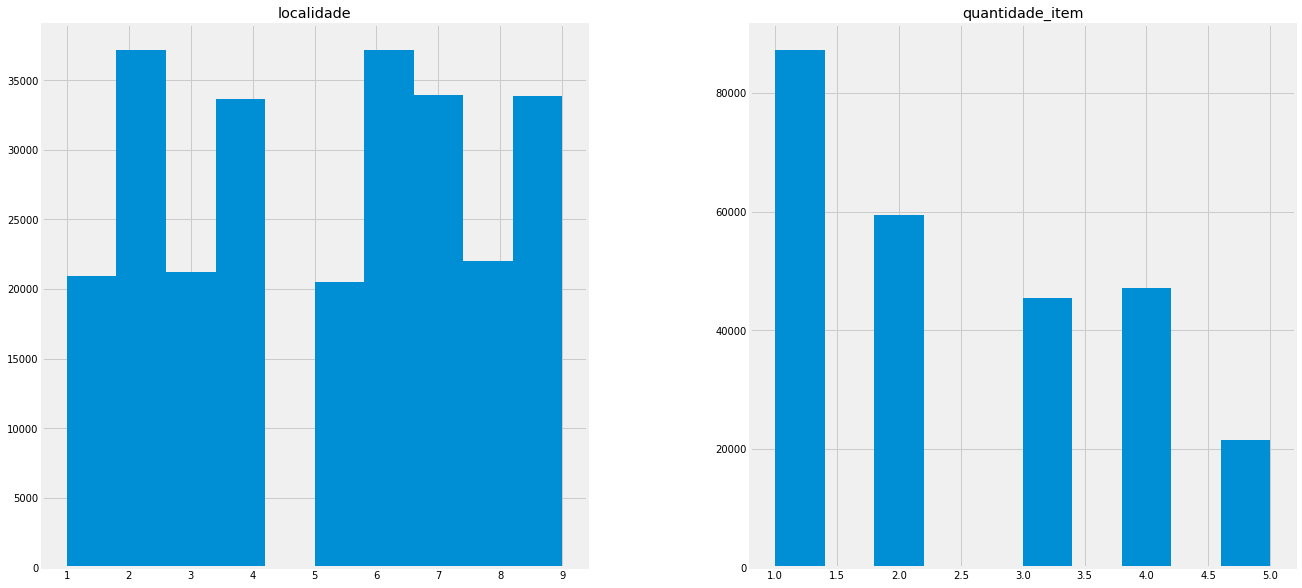

In [ ]:
food_df[['localidade', 'quantidade_item']].hist(figsize = (20,10))

### Análise III
a) analisar a demanda por região parece uma ótima ideia

b) analisar os itens separadamente parece um ótima ideia

c) a análise ao longo do tempo precisa ser feita (dias da semana)

In [ ]:
food_df.columns

Index(['id_transacao', 'horario_pedido', 'localidade', 'nome_item',
       'quantidade_item', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Converte objeto data para datetime
food_df['horario_pedido'] = pd.to_datetime(food_df['horario_pedido'], format = "%Y-%m-%d %H:%M:%S")

In [ ]:
# Criar novo dataset para mais análises
food_df_1 = food_df.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = ['quantidade_item']); food_df_1.head()

quantidade_item                       
nome_item             bebida pizza salada sobremesa
id_transacao                                       
0x10000a                 NaN   1.0    NaN       1.0
0x100058                 NaN   2.0    NaN       2.0
0x1000c8                 4.0   4.0    1.0       5.0
0x10014c                 NaN   1.0    NaN       1.0
0x1001d8                 3.0   3.0    NaN       3.0

In [ ]:
# Substituindo valores NaN por zeros
# devemos acreditar que os valores NaN correspondem a um produto não requisitado pelo cliente, então converter para zero é bem razoável
food_df_1 = food_df_1.fillna(0).reset_index(); food_df_1.head()

id_transacao quantidade_item                       
nome_item                       bebida pizza salada sobremesa
0             0x10000a             0.0   1.0    0.0       1.0
1             0x100058             0.0   2.0    0.0       2.0
2             0x1000c8             4.0   4.0    1.0       5.0
3             0x10014c             0.0   1.0    0.0       1.0
4             0x1001d8             3.0   3.0    0.0       3.0

In [ ]:
food_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   (id_transacao, )              100000 non-null  object 
 1   (quantidade_item, bebida)     100000 non-null  float64
 2   (quantidade_item, pizza)      100000 non-null  float64
 3   (quantidade_item, salada)     100000 non-null  float64
 4   (quantidade_item, sobremesa)  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
food_df_1.shape

(100000, 5)

### Análise IV
a) apesar da nova estrutura, não houve perda de dados, apenas um arranjo das observações

In [ ]:
food_df_1.describe()

quantidade_item                                             
nome_item          bebida          pizza         salada      sobremesa
count       100000.000000  100000.000000  100000.000000  100000.000000
mean             1.239590       1.857840       0.711370       2.569210
std              1.627886       1.588589       1.086524       1.332084
min              0.000000       0.000000       0.000000       1.000000
25%              0.000000       1.000000       0.000000       1.000000
50%              0.000000       1.000000       0.000000       2.000000
75%              3.000000       3.000000       1.000000       4.000000
max              5.000000       5.000000       5.000000       5.000000

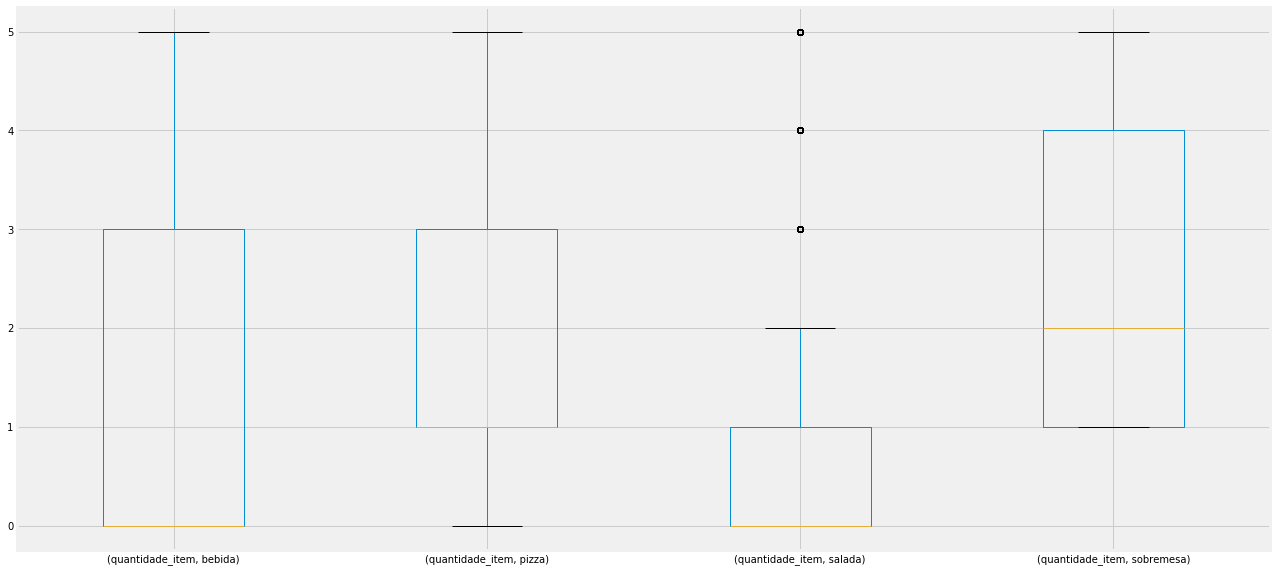

In [ ]:
# Analisar visualmente a nova tabela
food_df_1.boxplot(figsize = (20,10))

### Análise V
a) parece que quem pede pizza também pede pelo menos uma bebida

b) apesar dos outliers para salada, parece que quem pede salada também pede pelo menos uma bebida

c) o mesmo acontece para os pedidos de sobremesa

##### d) parece que existe a possibilidade de campanhas por parte do pessoal de marketing para melhorar os pedidos com combinações de itens.

In [ ]:
food_df_1.columns

MultiIndex([(   'id_transacao',          ''),
            ('quantidade_item',    'bebida'),
            ('quantidade_item',     'pizza'),
            ('quantidade_item',    'salada'),
            ('quantidade_item', 'sobremesa')],
           names=[None, 'nome_item'])

In [ ]:
# Adicionar o campo localidade para melhorar a análise dos pedidos
# criar novo dataset
food_df_local = pd.merge(food_df_1, food_df[['id_transacao','localidade']], on = 'id_transacao')

C:\Users\User\anaconda\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
food_df_local

,id_transacao,"(id_transacao, )","(quantidade_item, bebida)","(quantidade_item, pizza)","(quantidade_item, salada)","(quantidade_item, sobremesa)",localidade
0,0x10000a,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,0x1000c8,4.0,4.0,1.0,5.0,9
...,...,...,...,...,...,...,...
260640,0xfff07,0xfff07,1.0,1.0,0.0,1.0,2
260641,0xfff4d,0xfff4d,0.0,2.0,0.0,2.0,3
260642,0xfff4d,0xfff4d,0.0,2.0,0.0,2.0,3
260643,0xfffb8,0xfffb8,0.0,1.0,0.0,1.0,2


In [ ]:
food_df_local.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260645 entries, 0 to 260644
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_transacao                  260645 non-null  object 
 1   (id_transacao, )              260645 non-null  object 
 2   (quantidade_item, bebida)     260645 non-null  float64
 3   (quantidade_item, pizza)      260645 non-null  float64
 4   (quantidade_item, salada)     260645 non-null  float64
 5   (quantidade_item, sobremesa)  260645 non-null  float64
 6   localidade                    260645 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


In [ ]:
# Busca valores NaN
food_df_local.isna().any().sum()

0

In [ ]:
# deleta coluna duplicada
del food_df_local['id_transacao']

In [ ]:
food_df_local

,"(id_transacao, )","(quantidade_item, bebida)","(quantidade_item, pizza)","(quantidade_item, salada)","(quantidade_item, sobremesa)",localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9
...,...,...,...,...,...,...
260640,0xfff07,1.0,1.0,0.0,1.0,2
260641,0xfff4d,0.0,2.0,0.0,2.0,3
260642,0xfff4d,0.0,2.0,0.0,2.0,3
260643,0xfffb8,0.0,1.0,0.0,1.0,2


In [ ]:
# Altera nomes das colunas
food_df_local.columns = ['id_transacao', 'bebida', 'pizza', 'salada', 'sobremesa', 'localidade']; food_df_local.head()

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A780AC99C8>,
      dtype=object)

<Figure size 2160x1080 with 0 Axes>

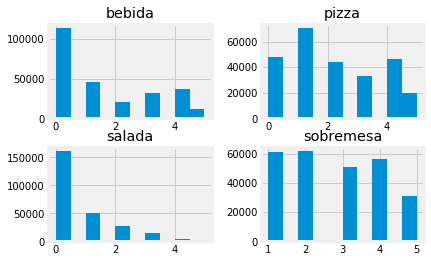

In [ ]:
plt.figure(1, figsize = (30,15))

food_df_local[['bebida', 'pizza', 'salada', 'sobremesa']].hist()


Iniciando formação de gráficos. Por favor aguarde!


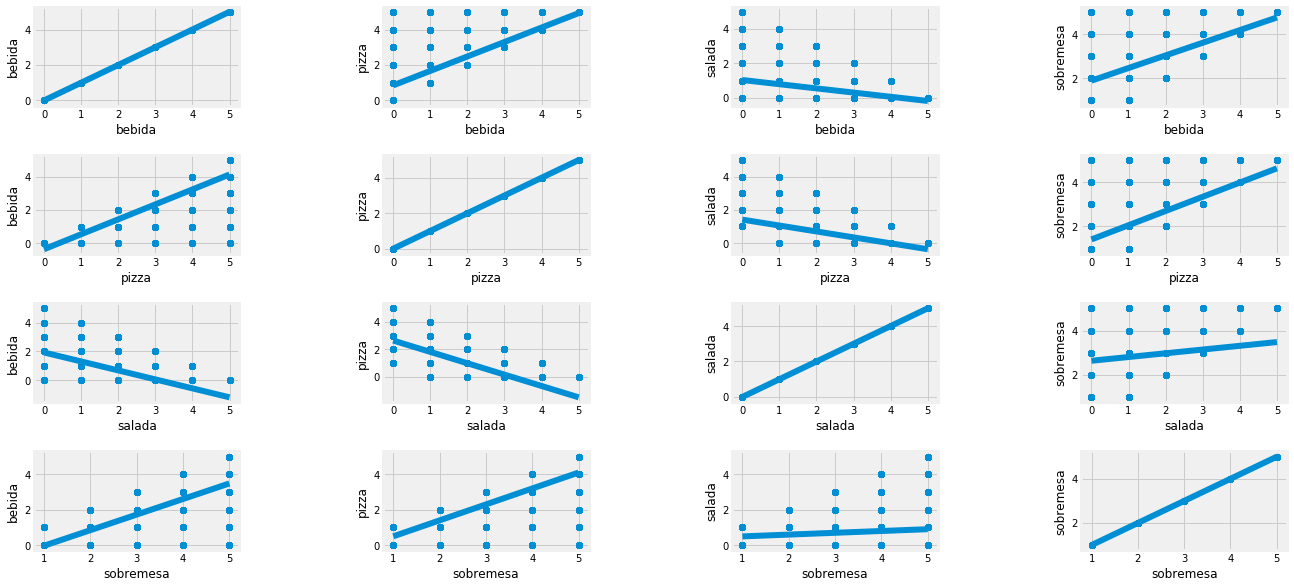

Wall time: 5min 53s


In [ ]:
%%time
plt.figure(1, figsize = (20,10))
n = 0

print("\nIniciando formação de gráficos. Por favor aguarde!")
for i in ['bebida', 'pizza', 'salada', 'sobremesa']:
    for j in ['bebida', 'pizza', 'salada', 'sobremesa']:
        n += 1
        plt.subplot(4, 4, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.7)
        plt.ylabel(j)
        sb.regplot(x = i, y = j, data = food_df_local)
plt.show()

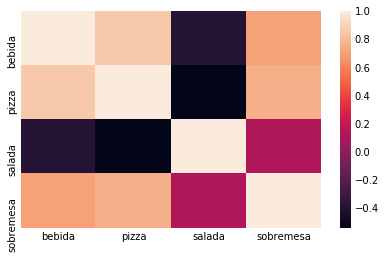

In [ ]:
food_cor = food_df_local[['bebida', 'pizza', 'salada','sobremesa']].corr()
sb.heatmap(food_cor)

In [ ]:
# Gera gráficos de cada produto por localidade

food_group = food_df_local.groupby('localidade')[['bebida', 'pizza', 'salada','sobremesa']].count().sort_values(by = 'sobremesa'); food_group

,bebida,pizza,salada,sobremesa
localidade,,,,
5,20503,20503,20503,20503
1,20961,20961,20961,20961
3,21252,21252,21252,21252
8,22028,22028,22028,22028
4,33677,33677,33677,33677
9,33877,33877,33877,33877
7,33968,33968,33968,33968
2,37180,37180,37180,37180
6,37199,37199,37199,37199


In [ ]:
# Gera gráficos de cada produto por localidade

food_group = food_df_local.groupby('localidade')[['bebida', 'pizza', 'salada','sobremesa']].mean().sort_values(by = 'sobremesa'); food_group

,bebida,pizza,salada,sobremesa
localidade,,,,
2,0.640452,1.849354,0.218128,2.067483
6,0.658942,1.867362,0.219307,2.086669
3,0.673537,1.075805,1.425231,2.501035
1,0.671867,1.052383,1.458948,2.511331
5,0.699898,1.040921,1.472467,2.513388
8,0.783866,1.162430,1.399174,2.561603
7,2.767899,3.036387,0.378415,3.414802
4,2.796241,3.057131,0.369154,3.426285
9,2.773799,3.060897,0.368303,3.429200


### Análise VI
a) Nos primeiros gráficos de histograma por itens (alimentos) observa-se a seguinte ordem por volume de pedidos:
    sobremesas, pizza, bebida e salada
    
b) Nos gráficos de correlação, observa-se que todas as combinações possuem algum grau de correlacionamento positivo ou negativo.

c) no gráfico de correlação fica claro a baixa relação de compras entre os itens sobremesa e salada. Nos dias de hoje, essa realmente parece ser uma combinação que não se destaca dado o fato da salada ser conhecida como light food (baixo em calorias) e a sobremesa ser fat food (comida gorda ou carrega de carboidratos).

c) nas tabelas por agrupamento, observa-se que tanto os totais quanto as médias, ordenados por SOBREMESA, possuem similaridade. Destaca-se as localidades 4, 7 e 9 pelo volume de itens pedidos.

## <font color = 'green'>3. Transformações no dataframe; engenharia de dados; análise gráfica</font>

In [ ]:
food_df.columns

Index(['id_transacao', 'horario_pedido', 'localidade', 'nome_item',
       'quantidade_item', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
from datetime import datetime, timedelta
from pandas import DataFrame

In [ ]:
# Criar novo dataset para analisar algumas variáveis por dia da semana
food_df_tempo = pd.merge(food_df_local, food_df[['id_transacao','horario_pedido']], on = 'id_transacao')

In [ ]:
# Crianova coluna MÊS
food_df_tempo['mes'] = pd.to_datetime(food_df_tempo['horario_pedido'])

In [ ]:
food_df_tempo['mes'] = food_df_tempo.mes.dt.month

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5
...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11


In [ ]:
# Cria nova coluna DIA
food_df_tempo['dia'] = pd.to_datetime(food_df_tempo['horario_pedido'])

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,2019-05-05 00:08:00
...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,2019-07-18 00:17:00
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00


In [ ]:
# Cria nova coluna DIA DA SEMANA
# monday (segunda-feira) = 0
# sunday(domingo) = 7
food_df_tempo['dia_semana'] = food_df_tempo.dia.dt.dayofweek

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia,dia_semana
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,2019-05-05 00:08:00,6
...,...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,2019-07-18 00:17:00,3
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00,3
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00,3
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00,3


In [ ]:
# Deletar coluna dia
del food_df_tempo['dia']; food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia_semana
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,6
...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,3
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3


In [ ]:
food_df_tempo['hora'] = food_df_tempo.horario_pedido.apply(lambda x: x.hour)

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia_semana,hora
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,6,0
...,...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,3,0
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3,0
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3,0
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3,0


In [ ]:
food_df_tempo['mes'].nunique()

12

Text(0.5, 1.0, 'Volume de pedidos X mês')

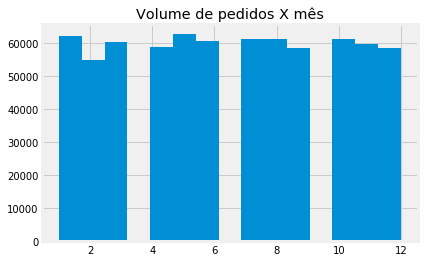

In [ ]:
food_df_tempo['mes'].hist(bins = 15)
plt.title("Volume de pedidos X mês")

In [ ]:
food_df_tempo['dia_semana'].nunique()

7

Text(0.5, 1.0, 'Volume de Pedidos X Dia da Semana')

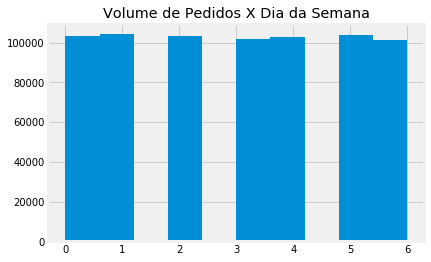

In [ ]:
food_df_tempo['dia_semana'].hist()
plt.title("Volume de Pedidos X Dia da Semana")

In [ ]:
food_df_tempo['hora'].nunique()

15

Text(0.5, 1.0, 'Volume de Pedidos X Hora')

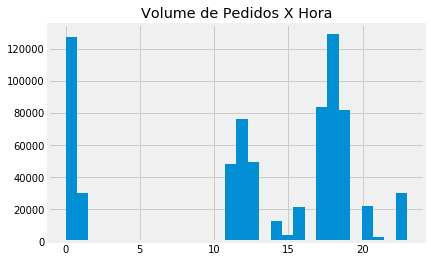

In [ ]:
food_df_tempo['hora'].hist(bins = 30)
plt.title("Volume de Pedidos X Hora")

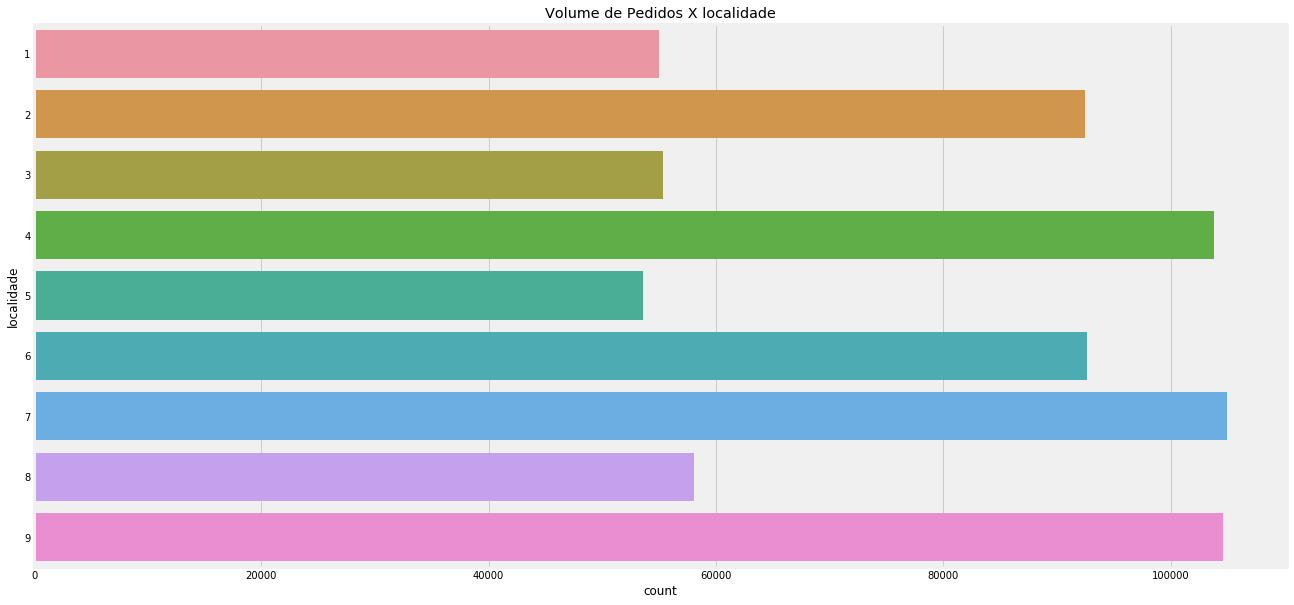

In [ ]:
plt.figure(1, figsize = (20,10))
sb.countplot(data = food_df_tempo, y = 'localidade')
plt.title("Volume de Pedidos X localidade")
plt.show()

In [ ]:
del food_df_tempo['horario_pedido']

### Análise VII
a) O volume de pedidos por mês segfue sem grandes alterações significativas

b) O volume de pedidos é muito parecido em todos os dias da semana

c) os horários de pico são às uma hora da manhã (meia-noite) e em torno das 17 horas (variação de 1h). Por volta do meio-dia também há um leve aumento de pedidos (variação de 1h).

d) existe uma grande variação entre os volumes de pedido de cada localidade. Este parece ser um ponto que se deva aprofundar em relação a que itens são mais demandados em cada local.

## <font color = 'red'> Segmentação por produtos</font>

In [ ]:
# criação de uma coluna de indice, pois não há uma coluna no dataset com valores únicos
food_df_tempo.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            720533, 720534, 720535, 720536, 720537, 720538, 720539, 720540,
            720541, 720542],
           dtype='int64', length=720543)

In [ ]:
df = food_df_tempo.reset_index()

In [ ]:
df.head()

,index,id_transacao,bebida,pizza,salada,sobremesa,localidade,mes,dia_semana,hora
0,0,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
1,1,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
2,2,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
3,3,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
4,4,0x100058,0.0,2.0,0.0,2.0,6,5,6,0


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.dtypes

index             int64
id_transacao     object
bebida          float64
pizza           float64
salada          float64
sobremesa       float64
localidade        int64
mes               int64
dia_semana        int64
hora              int64
dtype: object

In [ ]:
# A coluna id_transação não mais necessária
del df['id_transacao']

### <font color = 'green'> Aplicar clusterização para segmentação </font>

In [ ]:
# Carregar pacotes para clusterização
# normalizar os dados
from sklearn.preprocessing import StandardScaler

# Cria os agrupamentos
from sklearn.cluster import KMeans

# Separa dados de treinamento
from sklearn.model_selection import train_test_split

# Decompor a massa de dados em componentes
from sklearn.decomposition import PCA

# Avalia o score do kmeans
from sklearn.metrics import silhouette_score

### PARAMETROS DO KMeans:
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

Attributes:
cluster_centers_ndarray of shape (n_clusters, n_features) Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

labels_ndarray of shape (n_samples,) Labels of each point

inertia_float Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

n_iter_int Number of iterations run.

n_features_in_int Number of features seen during fit.

New in version 0.24.

feature_names_in_ndarray of shape (n_features_in_,) Names of features seen during fit. Defined only when X has feature names that are all strings.

source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

### PARAMETROS DO train_test_split:

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train#sklearn.model_selection.train_test_split

### PARAMETROS DO silhouette_score:

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score

### PARAMETROS DO  PCA:

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA

### <font color = 'green'> Primeira avaliação </font>
#### Usar PCA

In [ ]:
# Criar um gráfico para ajudar a escolher o número de componentes do PCA pode ser uma boa prática
# cria objeto PCA
pca = PCA()

# Extrai valores do dataset
k_values = df.values

# treina o pca
pca.fit(k_values)

# cria objeto que acumulará as variancias
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Cria o objeto que preserve 95% das variancias
c = np.argmax(pca_cumsum >= 0.95) + 1

In [ ]:
# número máximo de componentes?
print('O número máximo de componentes para o PCA é:', c)

O número máximo de componentes para o PCA é: 1


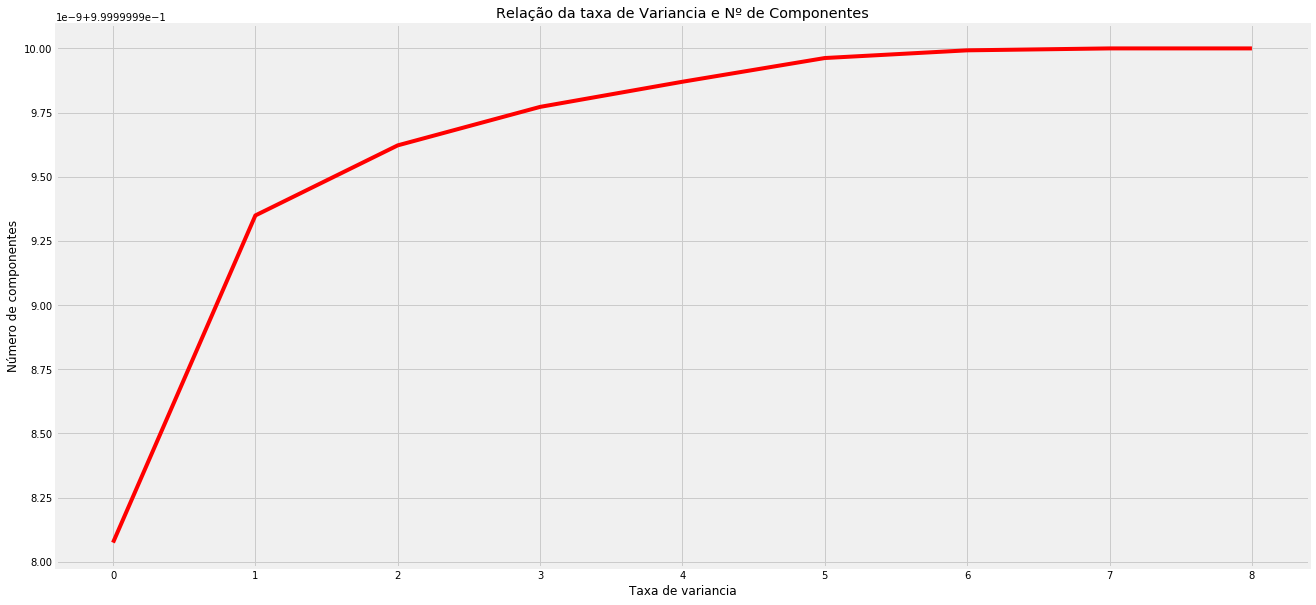

In [ ]:
# Observe o que acontece com número máximo igual a 1 quando plotamos
plt.figure(figsize = (20,10))

plt.plot(pca_cumsum, color = 'red')
plt.xlabel("Taxa de variancia")
plt.ylabel("Número de componentes")
plt.title("Relação da taxa de Variancia e Nº de Componentes")
plt.show()

### Com número máximo de componentes igual a 1, não precisarei aplicar o PCA como pre-requisito ao K-means.

## <font color = 'red'>ANÁLISE DA RELAÇÃO ENTRE AS VARIÁVEIS</font>
### <font color = 'green'>ps: Pizza e Salada</font>


In [ ]:
# Reduz o dataset para processamento dos gráficos
# Ajustar o PCA com as principais variáveis

df_sample = df.sample(frac=0.5, random_state = 590)

df_seg = df_sample[['pizza', 'salada', 'sobremesa', 'bebida', 'localidade']].copy()

### Não houve variação de resultado com a redução de variáveis

### Verificar os melhores agrupamentos com KMeans

In [ ]:
def elbow_wcss(versao):
    
    print('Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!')
    print('+++++++++++++++++++++++')

    # Criar objeto (lista) WCSS
    versao_wcss = []

    # Gera dados do KMeans
    for i in range(2,15):
        # cria objeto KMeans
        km = KMeans(n_clusters = i, init = 'random')
        # treina objeto
        km.fit_transform(versao)
        versao_wcss.append(km.inertia_)
        print(i, km.inertia_)

    # Cria gráfico de Elbow
    plt.figure(figsize = (10,8))
    plt.plot(range(2,15), versao_wcss, 'o')
    plt.plot(range(2,15), versao_wcss, '-')
    plt.title('Avaliação dos melhores agrupamentos')
    plt.xlabel('Número de Clusters')
    plt.ylabel('wcss')
    plt.show()

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 492532.58960254444
3 257728.44551067302
4 178897.35849352152
5 152101.6485879953
6 125153.97240629507
7 96816.63583920195
8 94600.19874752361
9 64902.037506261775
10 61076.10786123489
11 41996.92845448515
12 44728.4906935961
13 30859.52460578318
14 40150.323998237705


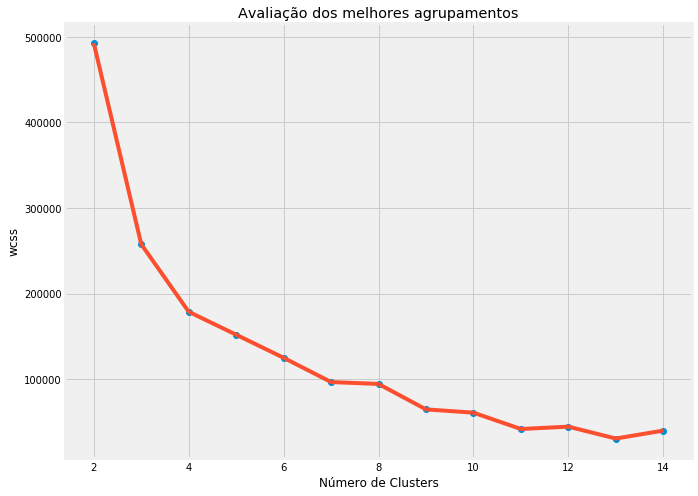

Wall time: 25.2 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
ps = df_seg[['pizza', 'salada']].iloc[ : ].values

elbow_wcss(ps)

### Investigar 3 agrupamentos para a relação PIZZA e SALADA

In [ ]:
# Treinamento com 3 agrupamentos
model_clusters = KMeans(n_clusters = 3, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 3 agrupamentos
model_clusters.fit(ps)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

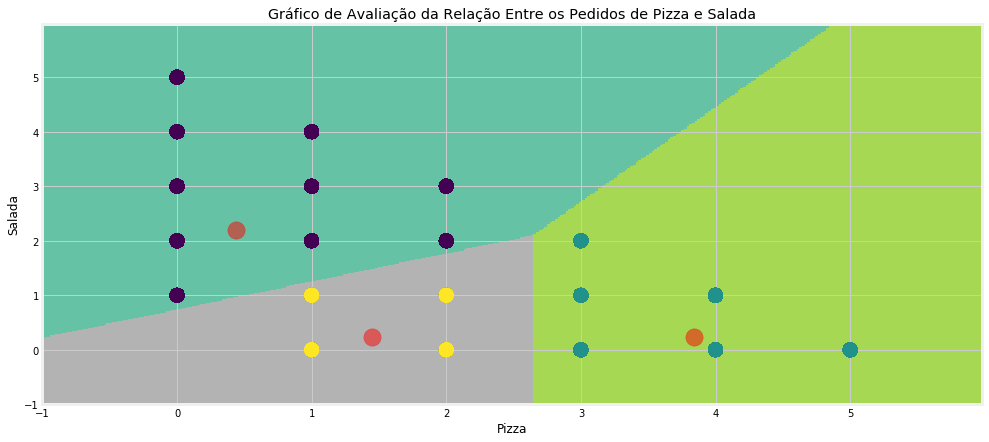

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = ps[:, 0].min() - 1, ps[:, 0].max() + 1
y_min, y_max = ps[:, 1].min() - 1, ps[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'pizza', y = 'salada', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Pizza e Salada')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a área superior verde escuro significa que houve mais pedidos de salada e menos de pizza;
##### 2. a área cinza indica que houve menos pedidos de salada e pizza;
##### 3. a área verde clara indica que houve poucos pedidos de salada e mais pedidos de pizza.

### <font color = 'green'>pso: Pizza e Sobremesa</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 447239.042461833
3 304563.8115057931
4 232832.18293800318
5 180394.7790096518
6 126467.85410784687
7 88481.12216019318
8 90821.06033526956
9 64215.181323496414
10 56629.77185171577
11 45417.48071835874
12 41721.58934692143
13 34267.74824059396
14 28743.98310237521


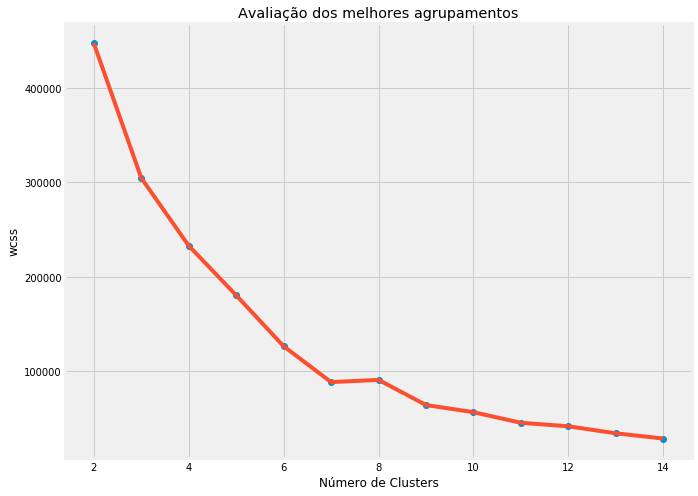

Wall time: 24.7 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
pso = df_seg[['pizza', 'sobremesa']].iloc[ : ].values

elbow_wcss(pso)

In [ ]:
# Treinamento com 2 agrupamentos

model_clusters = KMeans(n_clusters = 2, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 2 agrupamentos
model_clusters.fit(pso)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

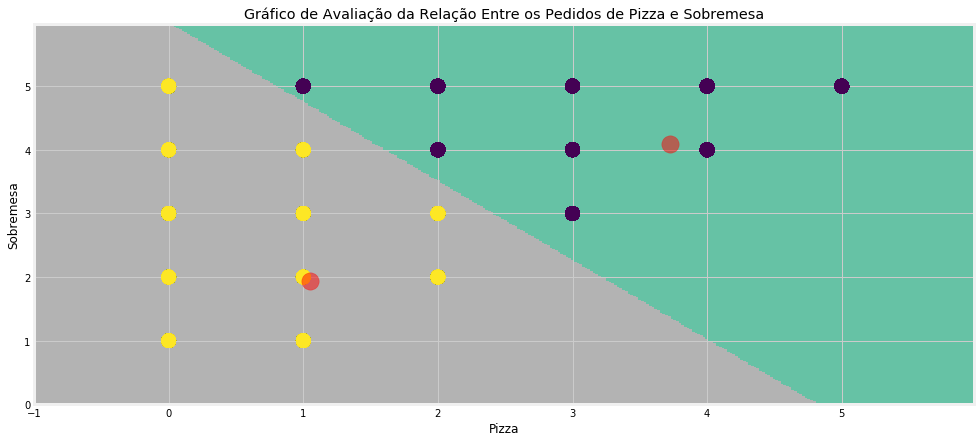

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = pso[:, 0].min() - 1, pso[:, 0].max() + 1
y_min, y_max = pso[:, 1].min() - 1, pso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'pizza', y = 'sobremesa', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Pizza e Sobremesa')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a área infeior cinza significa que houve mais pedidos de sobremesa e menos de pizza;
##### 2. a área verde mostra a manutenção de pedidos de sobremesa, mas um aumento de pedidos de pizza. Correlação positiva forte.

### <font color = 'green'>pb: Pizza e Bebida</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 460396.28689494013
3 288676.727332684
4 215675.32850501162
5 163810.66818073438
6 126838.12201869096
7 108073.03180856127
8 65551.05921392888
9 63676.57229673137
10 43721.1052320652
11 52762.31947156549
12 24358.086484618372
13 22220.209355814306
14 18671.549125499416


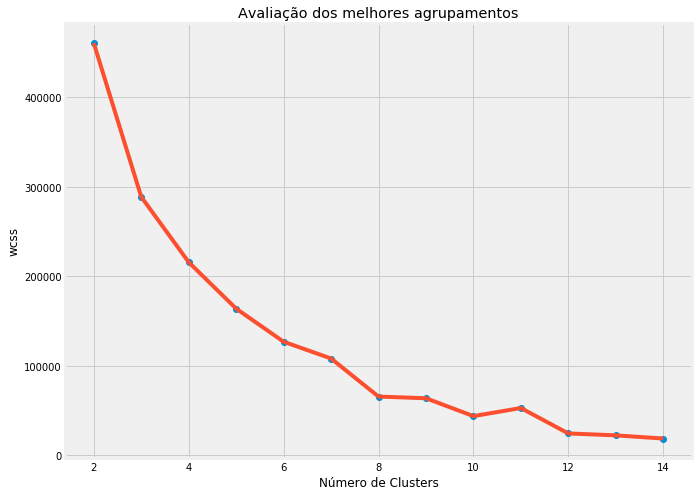

Wall time: 26.4 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
pb = df_seg[['pizza', 'bebida']].iloc[ : ].values

elbow_wcss(pb)

In [ ]:
# Treinamento com 2 agrupamentos

model_clusters = KMeans(n_clusters = 2, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 2 agrupamentos
model_clusters.fit(pb)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

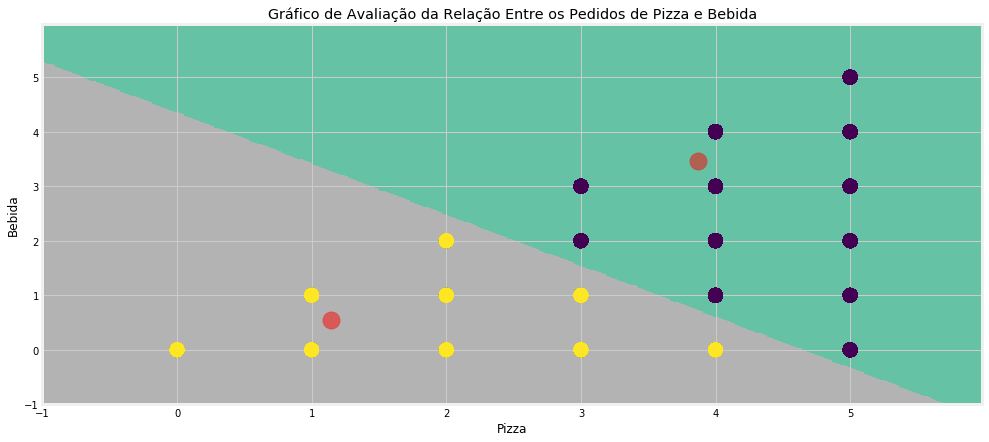

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = pb[:, 0].min() - 1, pb[:, 0].max() + 1
y_min, y_max = pb[:, 1].min() - 1, pb[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'pizza', y = 'bebida', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Bebida')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Pizza e Bebida')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a área cinza revela a forte combinação dos dois produtos. Quanto mais pizza são pedidas, mais bebidas são acrescentas no pedido. Na verdade estes dois itens tem uma correlação bem forte.

### Os primeiros quatro estudos focaram na relação da PIZZA com os outros produtos. Agora, irei focar na SALADA, que apresentou um comportamento inverso de consumo em relação à PIZZA.
### <font color = 'green'>sso: Salada e Sobremesa</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 499989.12918731413
3 268362.2756829134
4 207513.3114732481
5 147665.6297300538
6 120436.28671378638
7 102289.72815625316
8 75334.12662664414
9 72705.14626560052
10 54918.189407601494
11 59679.75751979051
12 50220.75527150628
13 41626.01995643674
14 34701.18646008451


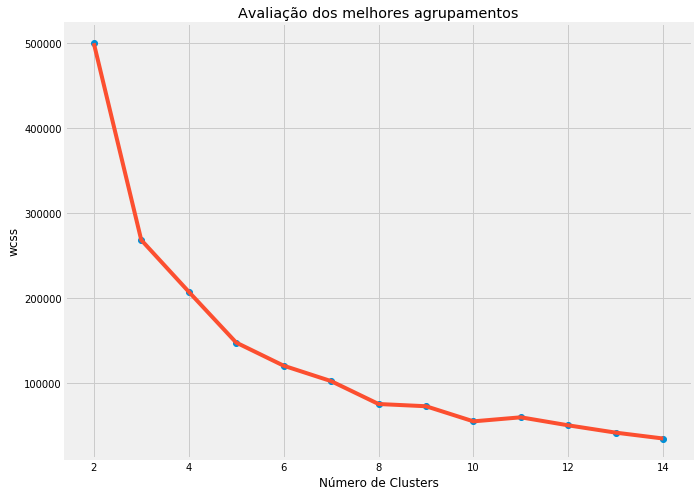

Wall time: 26.8 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
sso = df_seg[['salada', 'sobremesa']].iloc[ : ].values

elbow_wcss(sso)

In [ ]:
# Treinamento com 3 agrupamentos

model_clusters = KMeans(n_clusters = 3, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 3 agrupamentos
model_clusters.fit(sso)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

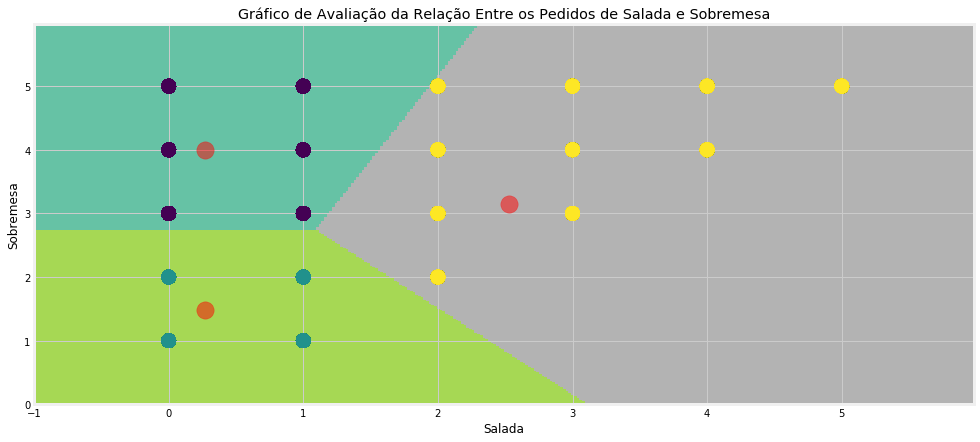

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = sso[:, 0].min() - 1, sso[:, 0].max() + 1
y_min, y_max = sso[:, 1].min() - 1, sso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'salada', y = 'sobremesa', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Salada')
plt.ylabel('Sobremesa')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Salada e Sobremesa')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a área verde escura representa a alta demanda por sobremesa para poucas saladas pedidas.
##### 2. a área verde clara aponta para um certo equilibrio entre os itens.
##### 3. já a área cinza demonstra uma forte concentração de pedidos de salada e a manutenção dos pedidos de sobremesa.

### Agora irei investigar cada produto por localidade
### <font color = 'green'>lp: Localidade e Pizza</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 1392828.367802197
3 996686.3350835204
4 650113.2484380127
5 506507.3781217671
6 396953.34532198944
7 346017.5556710031
8 301629.6244819505
9 254187.1361595591
10 231450.33111529858
11 196706.86368908707
12 182879.1202878935
13 161281.50519706047
14 144913.6201521961


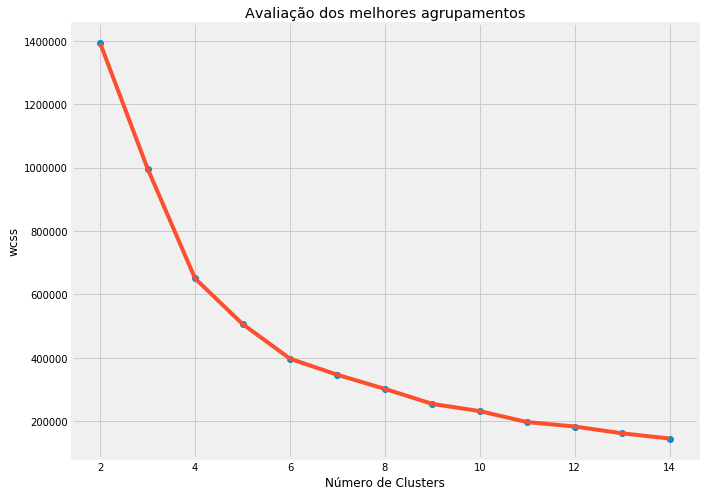

Wall time: 23.4 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
lp = df_seg[['localidade', 'pizza']].iloc[ : ].values

elbow_wcss(lp)

In [ ]:
# Treinamento com 4 agrupamentos

model_clusters = KMeans(n_clusters = 4, 
                     init = 'k-means++', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 4 agrupamentos
model_clusters.fit(lp)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

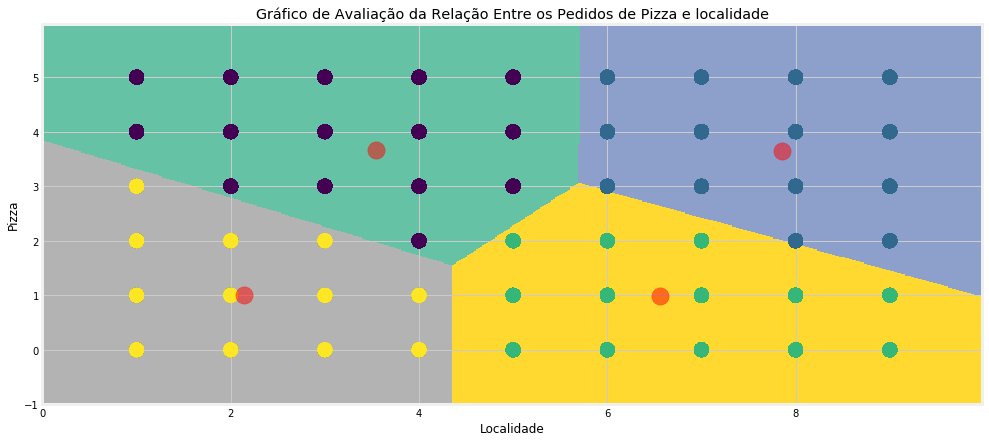

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = lp[:, 0].min() - 1, lp[:, 0].max() + 1
y_min, y_max = lp[:, 1].min() - 1, lp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'localidade', y = 'pizza', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Pizza')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Pizza e localidade')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3, 2 agrupamentos para uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a área cinza e amarela revelam os pedidos de baixo a médio das localidades de 1 (maior consumo) a 4, 8 e 9 (menor consumo)
##### 2. a área verde e azul a maior demanda das localidades de 1 a 9, sendo a localidade 4, 8 e 9  com menor consumo.
##### 3. Foram testados para 5, 6, 7 e 8 agrupamentos, mas houve sobreposição

### <font color = 'green'>ps: Localidade e Salada</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 904414.4684716369
3 606790.3643462481
4 454572.0208793844
5 371446.701473871
6 266595.38348531193
7 207032.31866314865
8 178591.37199627727
9 166324.78963794754
10 148628.31321230985
11 126048.2258263125
12 119711.04945860716
13 107199.83593708185
14 99513.574015654


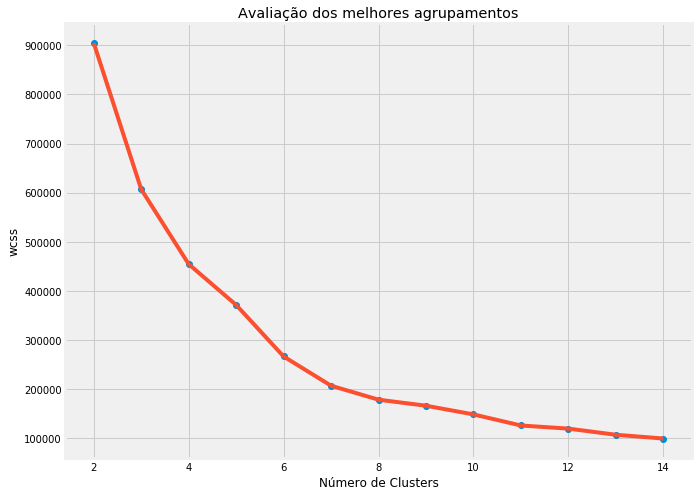

Wall time: 27.1 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
ls = df_seg[['localidade', 'salada']].iloc[ : ].values

elbow_wcss(ls)

In [ ]:
# Treinamento com 8 agrupamentos

model_clusters = KMeans(n_clusters = 8, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 8 agrupamentos
model_clusters.fit(ls)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

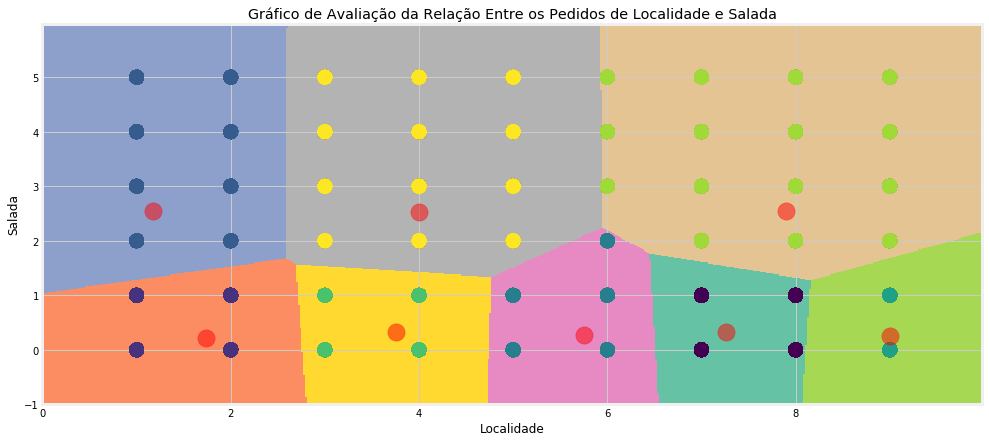

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = ls[:, 0].min() - 1, ls[:, 0].max() + 1
y_min, y_max = ls[:, 1].min() - 1, ls[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'localidade', y = 'salada', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Salada')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Localidade e Salada')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a vou considerar as áreas de maior demanda (azul, cinza e bege) para todas as localidades.
##### 2. foram testadas para 4 a 7 agrupamentos, os quais revelaram outras informações úteis, mas que dependem d estratégia de marketing para a seleção da melhor segmentação.

### <font color = 'green'>pso: Localidade e Sobremesa</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 1188103.947492261
3 848157.0823618278
4 596162.1426732183
5 481518.2731701285
6 392411.64979057224
7 301314.37975470064
8 266345.38800680503
9 229240.8698905041
10 211969.089786331
11 192441.88853853013
12 177535.45580243613
13 162597.53049171378
14 145397.49690768056


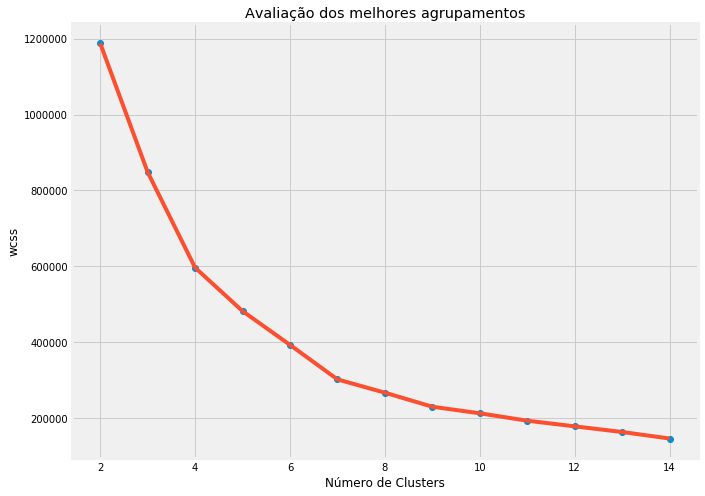

Wall time: 22.5 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
lso = df_seg[['localidade', 'sobremesa']].iloc[ : ].values

elbow_wcss(lso)

In [ ]:
# Treinamento com 8 agrupamentos

model_clusters = KMeans(n_clusters = 8, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 8 agrupamentos
model_clusters.fit(lso)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

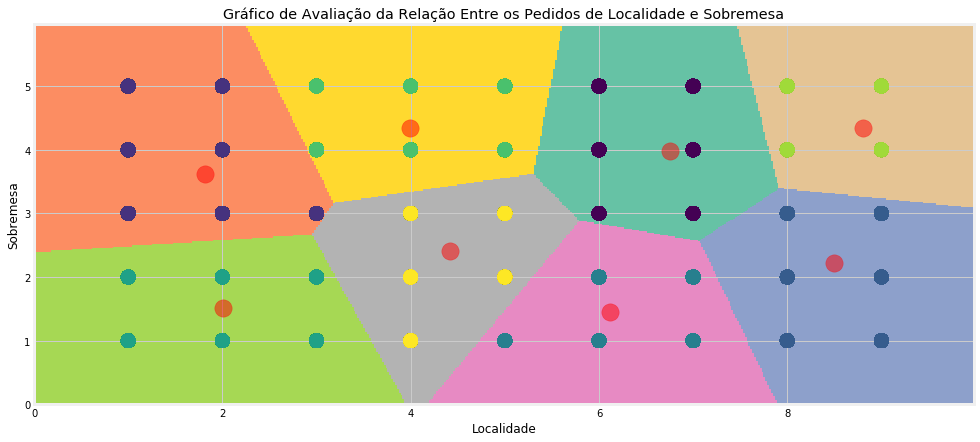

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = lso[:, 0].min() - 1, lso[:, 0].max() + 1
y_min, y_max = lso[:, 1].min() - 1, lso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'localidade', y = 'sobremesa', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Sobremesa')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Localidade e Sobremesa')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. a distribuição entre as localidades e volume demanda por sobremesa parece bem heterogenea, podendo ser divida em apenas pedidos acima de unidade e abaixo de três unidades.

### <font color = 'green'>lb: Localidade e Bebida</font>

Aguarde enquanto os dados são calculados para criar o gráfico! Isso pode levar alguns minutos!
+++++++++++++++++++++++
2 1506445.5293744514
3 1012570.3752130038
4 597981.9041148252
5 438938.36792138335
6 361102.4832874784
7 313171.18394481466
8 294466.1359034114
9 242831.59890870238
10 200438.63668289292
11 204201.9518318266
12 168385.33567129503
13 151464.99119990194
14 135243.74653502245


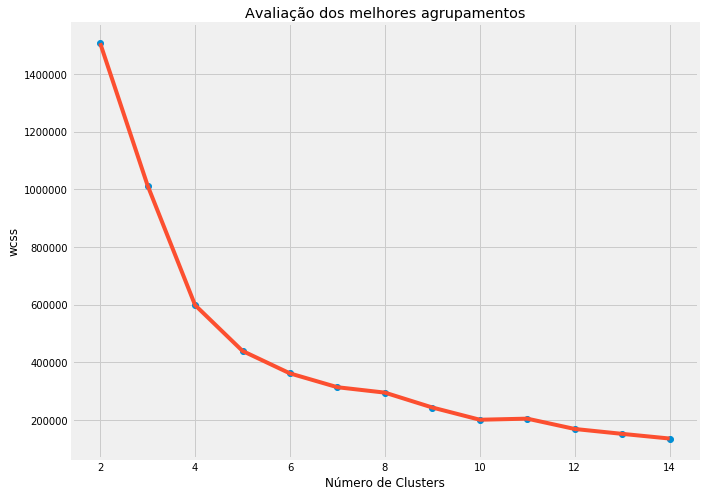

Wall time: 24.7 s


In [ ]:
%%time
# Calcula o wcss para construção do gráfico elbow, calcula o KMeans
lb = df_seg[['localidade', 'bebida']].iloc[ : ].values

elbow_wcss(lb)

In [ ]:
# Treinamento com 8 agrupamentos

model_clusters = KMeans(n_clusters = 8, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Treina o modelo para 8 agrupamentos
model_clusters.fit(lb)

# extrair os centroídes
centros = model_clusters.cluster_centers_

# extrair as labels
labels = model_clusters.labels_

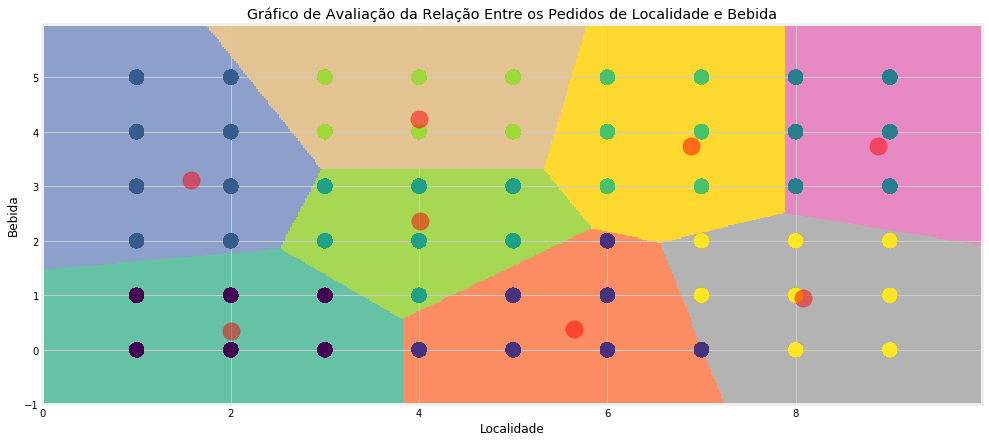

In [ ]:
# criar gráficos com agrupamentos e centroides

# Plot
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = lb[:, 0].min() - 1, lb[:, 0].max() + 1
y_min, y_max = lb[:, 1].min() - 1, lb[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Cria modelo preditivo no Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter(x = 'localidade', y = 'bebida', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Bebida')
plt.title('Gráfico de Avaliação da Relação Entre os Pedidos de Localidade e Bebida')
plt.show()

### <font color = "red">INTERPRETAÇÃO</font>

#### A interpretação, ou a própria construção deste tipo de gráfico depende do que o cliente do projeto deseja saber sobre segmentação. O que eu quero dizer é que o cliente precisa ter a ideia de como deseja investir: em 4, 3,2 ou uma campanha de marketing?
#### Os pontos vermelhos indicam os centros para os vizinhos mais próximos(KMeans)

#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. Outra imagem com bastante subdivisões. Provavelmente pode ser reduzida para ações de marketing mais abrangentes / menos específicas, com 2 ou três agrupamentos a menos.

### <font color = "red">ANÁLISE DOS ITENS PARA OS PICOS DIÁRIOS DE PEDIDOS</font>

In [ ]:
df_sample.columns

Index(['index', 'bebida', 'pizza', 'salada', 'sobremesa', 'localidade', 'mes',
       'dia_semana', 'hora'],
      dtype='object')

Wall time: 386 ms


<Figure size 1440x720 with 0 Axes>

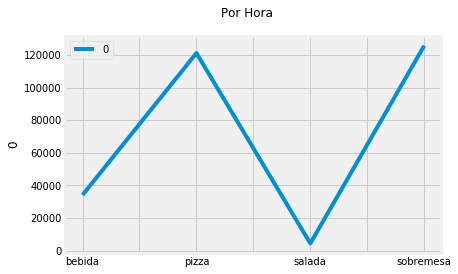

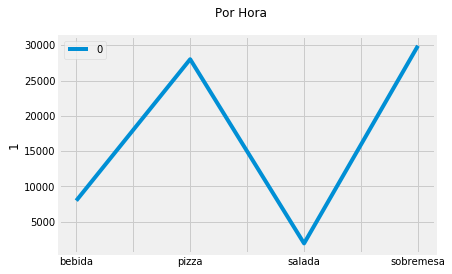

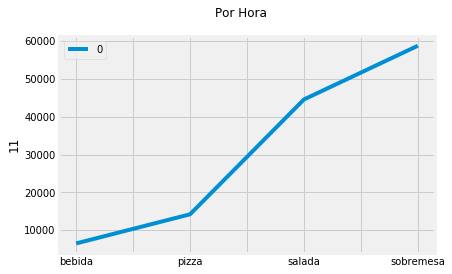

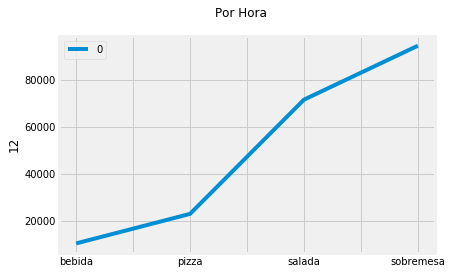

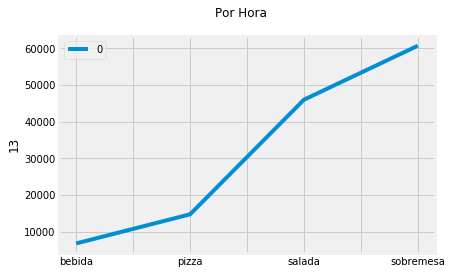

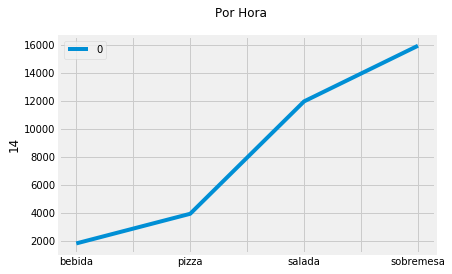

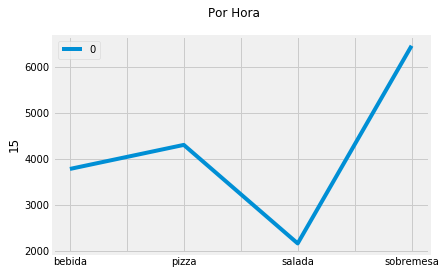

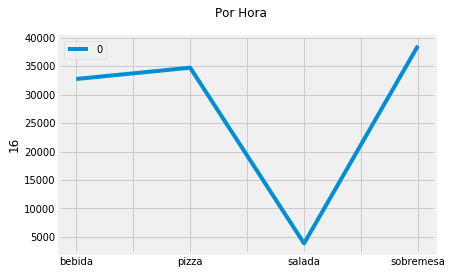

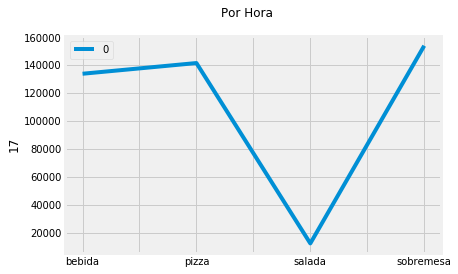

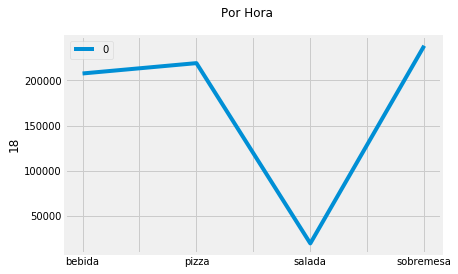

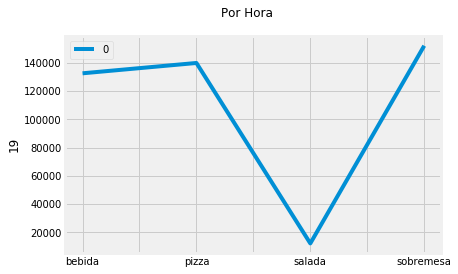

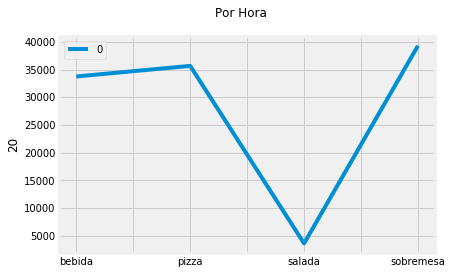

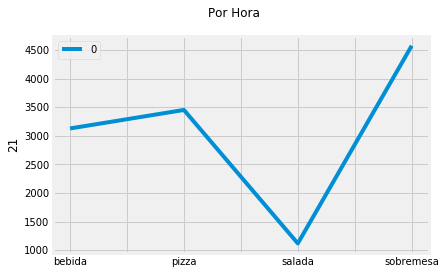

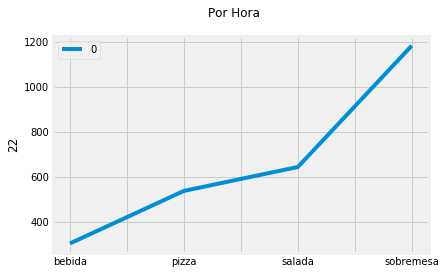

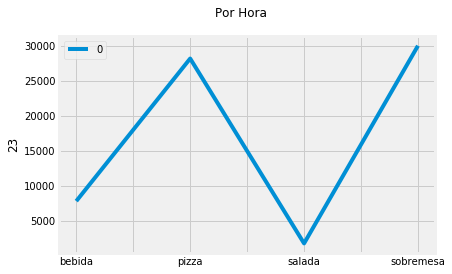

In [ ]:
%%time

plt.figure(1, figsize = (20,10))

# Foram excluídas as horas que não há pedidos
for i in [0,1,11,12,13,14,15,16,17,18,19,20,21,22,23]:

    temp = df_sample.loc[df_sample['hora'] == i]
    por_hora = pd.DataFrame(temp[['bebida', 'pizza', 'salada', 'sobremesa']].sum())
    plt.subplots_adjust(hspace=0.5, wspace=0.7)
    
    por_hora.plot()
    plt.ylabel(i)
    plt.suptitle("Por Hora")



### <font color = "red">INTERPRETAÇÃO DOS GRÁFICOS</font>

#### Os horários com maior demanda por PIZZA e SOBREMESA são:
* das 16h às 01h: lanche, jantar e ceia

#### Os horários em que a demanda por SALADA supera a PIZZA são:
* das 11h às 14h: almoço

#### A SOBREMESA parece acompanhar, na maioria das vezes, pedidos de PIZZA e SALADA:

#### Os horários em que a demanda por BEBIDA são altos:
* das 15h às 21h: lanche, jantar.

#### A demanda por BEBIDA é baixa:
* das 0  às 14h: ceia e almoço e tem baixa relação com os pedidos de SALADA.


# <font color = "blue">FIM</font>